In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 41.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 1.3MB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
from google.colab import drive
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
drive.mount('/content/drive',force_remount=True)
from google.colab import files
from io import BytesIO
from PIL import Image
from matplotlib import pyplot as plt


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
uploaded = files.upload()
Husky_1 = Image.open(BytesIO(uploaded['Husky_1.jpg']))

uploaded = files.upload()
Husky_2 = Image.open(BytesIO(uploaded['Husky_2.jpg']))

uploaded = files.upload()
Husky_3 = Image.open(BytesIO(uploaded['Husky_3.jpg']))

uploaded = files.upload()
Puppy_1 = Image.open(BytesIO(uploaded['Puppy_1.jpg']))

Saving Husky_1.jpg to Husky_1.jpg


Saving Husky_2.jpg to Husky_2.jpg


Saving Husky_3.jpg to Husky_3.jpg


Saving Puppy_1.jpg to Puppy_1.jpg


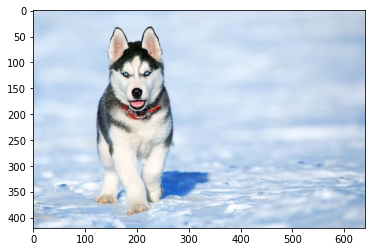

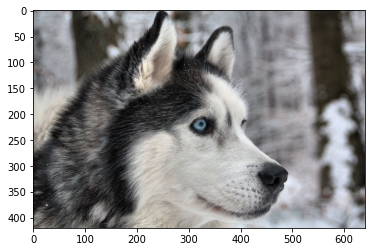

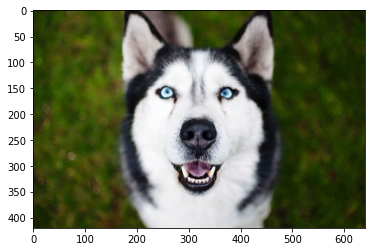

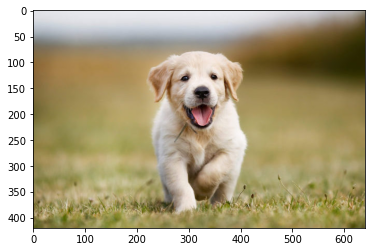

In [0]:
plt.imshow(Husky_1)
plt.show()

plt.imshow(Husky_2)
plt.show()

plt.imshow(Husky_3)
plt.show()

plt.imshow(Puppy_1)
plt.show()

In [0]:
Husky_1_np = np.asarray(Husky_1)
Husky_2_np = np.asarray(Husky_2)
Husky_3_np = np.asarray(Husky_3)
Puppy_1_np = np.asarray(Puppy_1)

In [0]:

detector = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = detector.detectAndCompute(Husky_1_np, None)
keypoints2, descriptors2 = detector.detectAndCompute(Husky_2_np, None)
keypoints3, descriptors3 = detector.detectAndCompute(Husky_3_np, None)
keypoints4, descriptors4 = detector.detectAndCompute(Puppy_1_np, None)

print(len(keypoints1))
print(len(keypoints2))
print(len(keypoints3))
print(len(keypoints4))

print(type(descriptors1))



524
884
373
585
<class 'numpy.ndarray'>


In [0]:
from sklearn.cluster import KMeans
#2c Bag of Words
#Step 1: Kmeans clustering on all the descriptors to get 8 cluster centroids

husky1_clusters = KMeans(n_clusters=8, random_state=0).fit(descriptors1)
husky2_clusters = KMeans(n_clusters=8, random_state=0).fit(descriptors2)
husky3_clusters = KMeans(n_clusters=8, random_state=0).fit(descriptors3)
puppy1_clusters = KMeans(n_clusters=8, random_state=0).fit(descriptors4)
#Cluster centroids of all images
husky1_centroids = husky1_clusters.cluster_centers_
husky2_centroids = husky2_clusters.cluster_centers_
husky3_centroids = husky3_clusters.cluster_centers_
puppy1_centroids = puppy1_clusters.cluster_centers_
#Creating sorted centroids
h3_centroid_sorted = husky3_centroids
h1_centroid_sorted = []
h2_centroid_sorted = []
p1_centroid_sorted = []

#Step2: Sort the centroids
#Between Husky3 and Husky1
for h3 in husky3_centroids:
  temp_lst = []
  for h1 in husky1_centroids:
    temp_lst.append(np.linalg.norm(h3-h1))
  idx = temp_lst.index(min(temp_lst))
  h1_centroid_sorted.append(husky1_centroids[idx])

#Between Husky3 and Husky2
for h3 in husky3_centroids:
  temp_lst = []
  for h2 in husky2_centroids:
    temp_lst.append(np.linalg.norm(h3-h2))
  idx = temp_lst.index(min(temp_lst))
  h2_centroid_sorted.append(husky2_centroids[idx])

#Between Husky3 and Puppy1
for h3 in husky3_centroids:
  temp_lst = []
  for p1 in puppy1_centroids:
    temp_lst.append(np.linalg.norm(h3-p1))
  idx = temp_lst.index(min(temp_lst))
  p1_centroid_sorted.append(puppy1_centroids[idx])


#Create histogram of each image
#Image 1
hist1 = [0,0,0,0,0,0,0,0]
for des1 in descriptors1:
  dist = []
  for dc1 in h3_centroid_sorted:
    dist.append(np.linalg.norm(des1-dc1))
  idx = dist.index(min(dist))
  hist1[idx] = hist1[idx]+1

#Image 2
hist2 = [0,0,0,0,0,0,0,0]
for des2 in descriptors2:
  dist = []
  for dc2 in h3_centroid_sorted:
    dist.append(np.linalg.norm(des2-dc2))
  idx = dist.index(min(dist))
  hist2[idx] = hist2[idx]+1

#Image 3
hist3 = [0,0,0,0,0,0,0,0]
for des3 in descriptors3:
  dist = []
  for dc3 in h3_centroid_sorted:
    dist.append(np.linalg.norm(des3-dc3))
  idx = dist.index(min(dist))
  hist3[idx] = hist3[idx]+1


#Image 4
hist4 = [0,0,0,0,0,0,0,0]
for des4 in descriptors4:
  dist = []
  for dc4 in h3_centroid_sorted:
    dist.append(np.linalg.norm(des4-dc4))
  idx = dist.index(min(dist))
  hist4[idx] = hist4[idx]+1


print("Image1",hist1)
print("Image2",hist2)
print("Image3",hist3)
print("Image4",hist4)










Image1 [83, 44, 23, 101, 42, 119, 85, 27]
Image2 [169, 69, 110, 94, 94, 149, 86, 113]
Image3 [49, 22, 57, 63, 58, 41, 35, 48]
Image4 [143, 56, 78, 47, 31, 108, 69, 53]


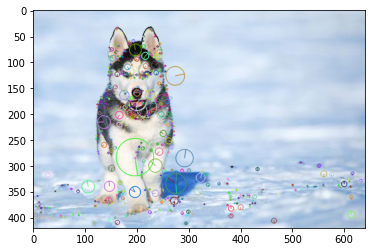

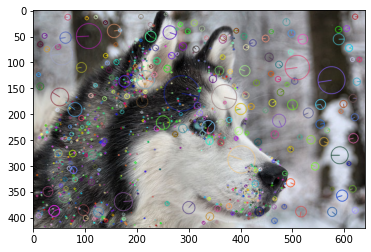

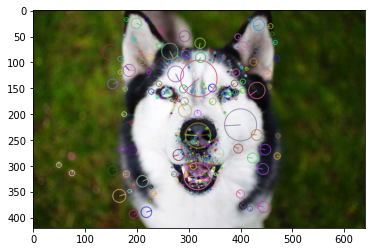

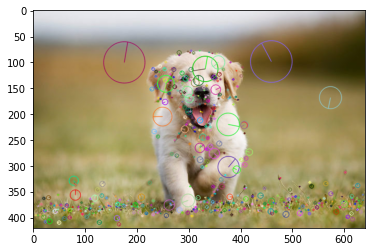

In [0]:
husky1_kp=cv2.drawKeypoints(Husky_1_np,keypoints1,Husky_1_np,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('drive/My Drive/EE569-Reports/husky1_kp.jpeg', husky1_kp)
plt.imshow(husky1_kp)
plt.show()

husky2_kp=cv2.drawKeypoints(Husky_2_np,keypoints2,Husky_2_np,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('drive/My Drive/EE569-Reports/husky2_kp.jpeg', husky2_kp)
plt.imshow(husky2_kp)
plt.show()

husky3_kp=cv2.drawKeypoints(Husky_3_np,keypoints3,Husky_3_np,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('drive/My Drive/EE569-Reports/husky3_kp.jpeg', husky3_kp)
plt.imshow(husky3_kp)
plt.show()

Puppy1_kp=cv2.drawKeypoints(Puppy_1_np,keypoints4,Puppy_1_np,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('drive/My Drive/EE569-Reports/puppy1_kp.jpeg', Puppy1_kp)
plt.imshow(Puppy1_kp)
plt.show()

198 70.33806610107422


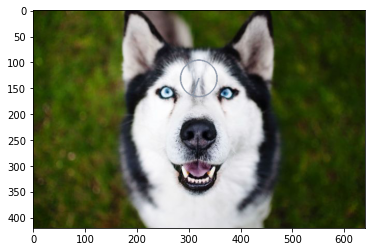

[378.85883, 428.6362, 441.54276, 449.0, 460.48343, 464.54062, 468.90512, 469.44647, 473.637, 473.86285, 477.2232, 479.9375, 481.79248, 481.89728, 483.1356, 484.25302, 485.11853, 486.89526, 488.18234, 489.59268, 490.30603, 491.73367, 492.9138, 494.8505, 496.10684, 496.81082, 498.78152, 499.33057, 499.56882, 500.43582, 503.741, 505.36224, 505.64612, 506.5886, 508.12204, 509.67834, 509.77545, 510.5409, 511.15945, 512.4168, 513.2972, 515.6714, 517.35095, 519.4642, 523.03253, 523.7108, 523.9294, 525.13043, 525.1571, 525.2209, 526.0551, 526.07983, 526.10266, 526.4969, 526.91364, 527.5481, 528.44586, 528.861, 529.2306, 529.5819, 529.5828, 530.3791, 530.5375, 531.01227, 531.71326, 532.2612, 532.52606, 532.7354, 533.65814, 535.4419, 535.6295, 535.64355, 536.23505, 536.4177, 537.12756, 539.6851, 540.718, 541.0619, 541.4167, 541.8155, 541.9271, 542.0692, 542.2601, 542.5127, 543.17035, 543.31116, 543.359, 544.699, 545.2981, 545.76917, 546.44946, 546.4805, 546.5867, 546.62787, 547.2522, 547.3801, 5

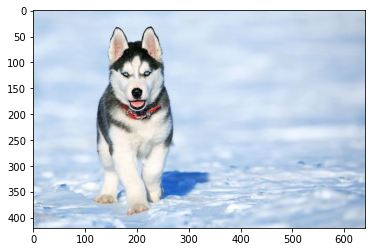

[<DMatch 0x7fd5bb634f30>]
1.9909073114395142


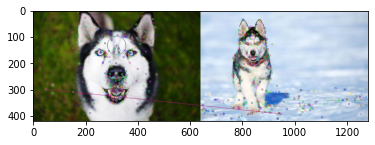

In [0]:
#Finding the keypoint with largest scale in Huskey_3 image and draw only that keypoint on the image
max_size = keypoints3[0].size
idx = 0
for i in range(0, len(keypoints3)):
  if(keypoints3[i].size > max_size):
    max_size = keypoints3[i].size
    idx = i
  else:
    continue

print (idx, max_size)
max_keypoint = []
max_keypoint.append(keypoints3[idx])
max_descriptors = descriptors3[idx]

handPickedDescritor3 = np.array([max_descriptors])

#print(max_keypoint)
#print(keypoints3[idx])
#print(max_keypoint[0].pt)
#print(max_descriptors)

#draw only that keypoint on huskey3 image
husky3_maxkp=cv2.drawKeypoints(Husky_3_np,max_keypoint,Husky_3_np,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('drive/My Drive/EE569-Reports/husky3_maxkp.jpeg', husky3_maxkp)
plt.imshow(husky3_maxkp)
plt.show()

#Iterate through all the descriptors of Huskey_1 and find the point with minimum distance in the corresponding image.
distance = []
for k in range(0, len(keypoints1)):
  dist = np.linalg.norm(max_descriptors - descriptors1[k])
  distance.append(dist)

sortedDistance = sorted(distance)
print(sortedDistance)

testDist = sortedDistance[522]


min_distance = testDist
min_idx = distance.index(min_distance)


matchKeyPoint = []
matchKeyPoint.append(keypoints1[min_idx]) 
print(min_idx, min_distance)
print(descriptors1[min_idx])
print(keypoints1[min_idx].pt)

#draw only that keypoint on huskey3 image
husky1_maxkp=cv2.drawKeypoints(Husky_1_np,matchKeyPoint,Husky_1_np,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('drive/My Drive/EE569-Reports/husky1_maxkp.jpeg', husky1_maxkp)
plt.imshow(husky1_maxkp)
plt.show()


# Brute Force matcher
bruteForce = cv2.BFMatcher()
matches = bruteForce.match(handPickedDescritor3, descriptors1)
print(matches)
print(keypoints1[matches[0].queryIdx].size)
#print(keypoints3[matches[0].trainIdx].pt)


matcheCorresponding = cv2.drawMatches(Husky_3_np,keypoints3,Husky_1_np,keypoints1,matches,None)
plt.imshow(matcheCorresponding)
plt.show()



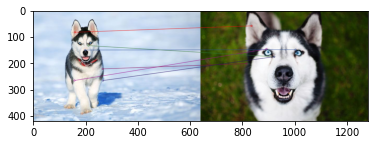

True

In [0]:
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors3, 2)

ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)


img_matches = np.empty((max(Husky_1_np.shape[0], Husky_3_np.shape[0]), Husky_1_np.shape[1]+ Husky_1_np.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(Husky_1_np, keypoints1, Husky_3_np, keypoints3, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches)
plt.show()

cv2.imwrite('drive/My Drive/EE569-Reports/H1H3(0.7).jpeg', img_matches)